In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('framingham.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [86]:
df.isnull().sum().sort_values(ascending=False)/100 # here we are givenn these kind of operation to do some sort of indicies

glucose            3.88
education          1.05
BPMeds             0.53
totChol            0.50
cigsPerDay         0.29
BMI                0.19
heartRate          0.01
male               0.00
age                0.00
currentSmoker      0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
dtype: float64

In [83]:
df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)/10<5].sum()/100 

0.49

In [97]:
df1 = df.copy()

In [98]:
df1.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [100]:
for cols in df1.columns.to_list():
    if df1[cols].dtypes == 'int64':
        df1[cols].fillna(df1[cols].mean, inplace=True)
    elif df1[cols].dtypes == 'float64':
        df1[cols].fillna(df1[cols].mean, inplace=True)

C:\Users\Raghav maheshwari\AppData\Local\Temp\ipykernel_15656\1250942190.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<bound method Series.mean of 0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
       ... 
4233    1.0
4234    3.0
4235    2.0
4236    1.0
4237    2.0
Name: education, Length: 4238, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1[cols].fillna(df1[cols].mean, inplace=True)
C:\Users\Raghav maheshwari\AppData\Local\Temp\ipykernel_15656\1250942190.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<bound method Series.mean of 0        0.0
1        0.0
2       20.0
3       30.0
4       23.0
        ... 
4233     1.0
4234    43.0
4235    20.0
4236    15.0
4237     0.0
Name: cigsPerDay, Length: 4238, dtype: float64>' has dtype incompatible with float64, p

In [101]:
df1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [119]:
df1.dtypes, df.dtypes.values

(male                 int64
 age                  int64
 education           object
 currentSmoker        int64
 cigsPerDay          object
 BPMeds              object
 prevalentStroke      int64
 prevalentHyp         int64
 diabetes             int64
 totChol             object
 sysBP              float64
 diaBP              float64
 BMI                 object
 heartRate           object
 glucose             object
 TenYearCHD           int64
 dtype: object,
 array([dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'),
        dtype('float64'), dtype('float64'), dtype('int64'), dtype('int64'),
        dtype('int64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('int64')], dtype=object))

C:\Users\Raghav maheshwari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raghav maheshwari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raghav maheshwari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raghav maheshwari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

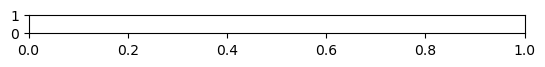

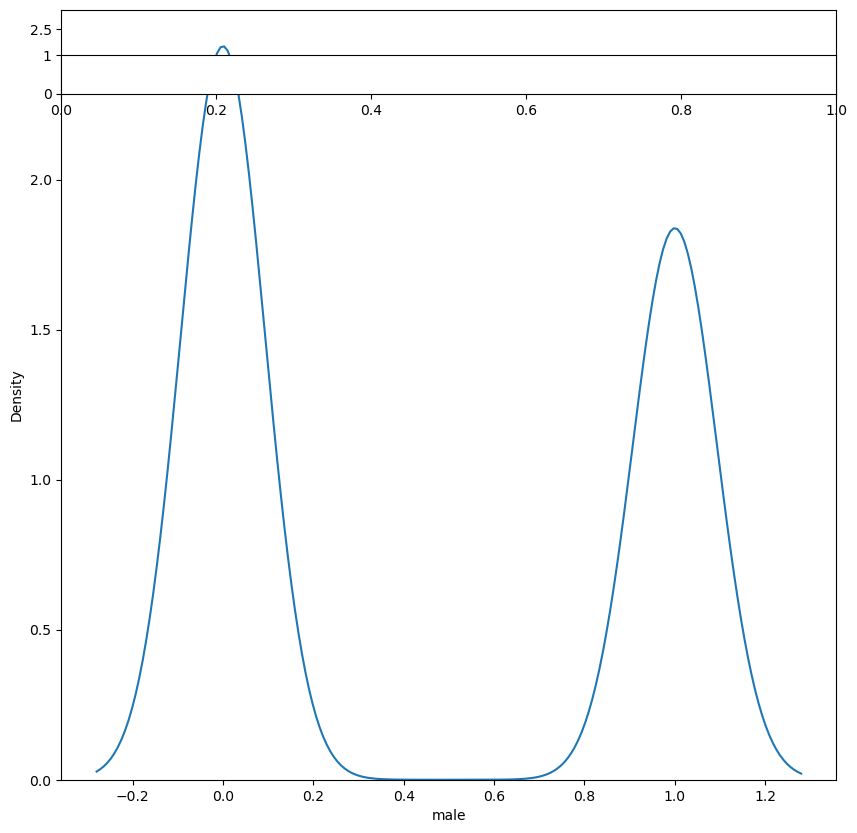

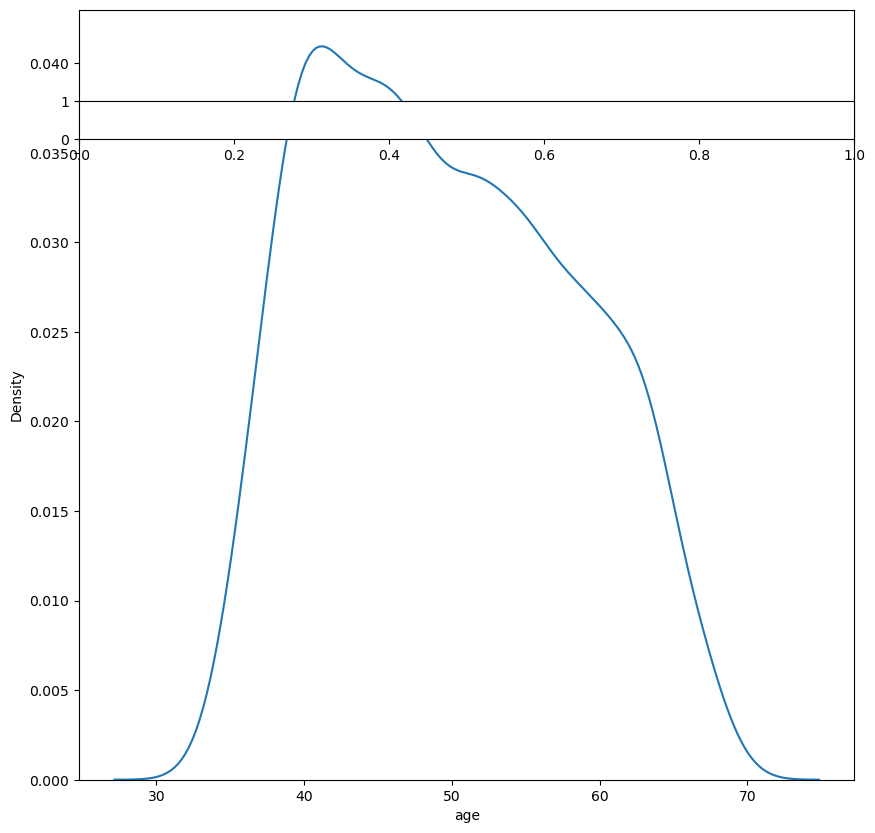

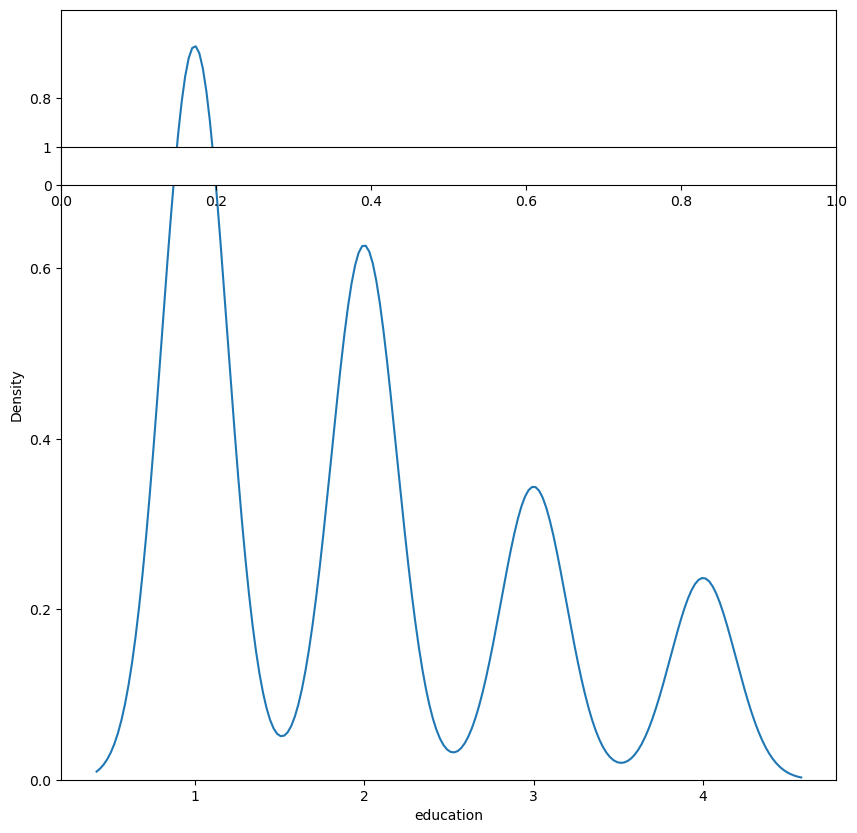

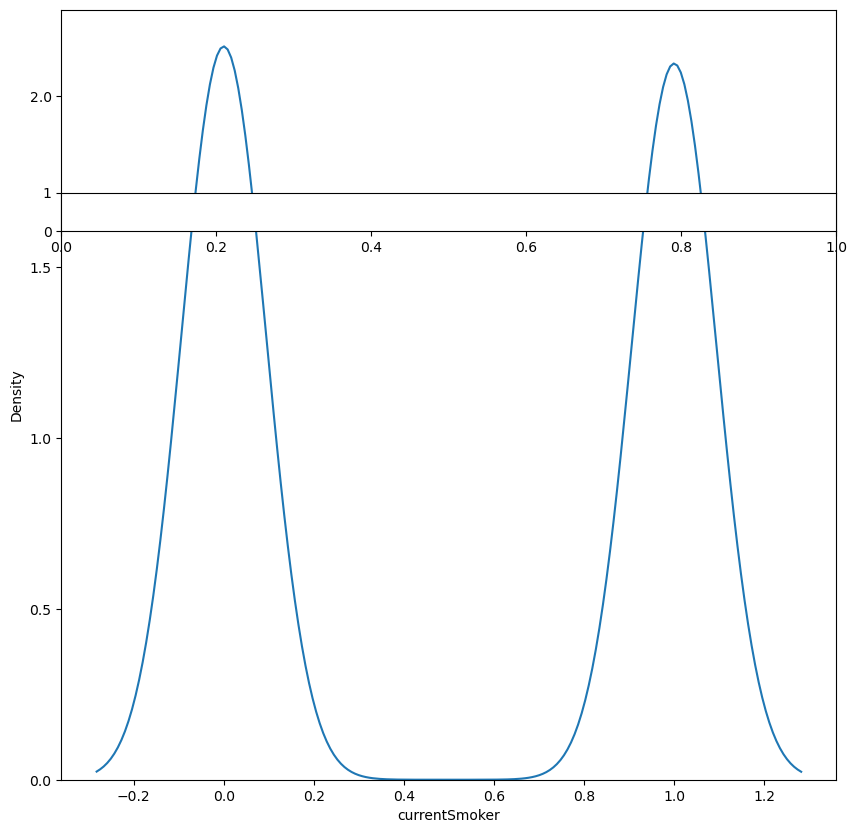

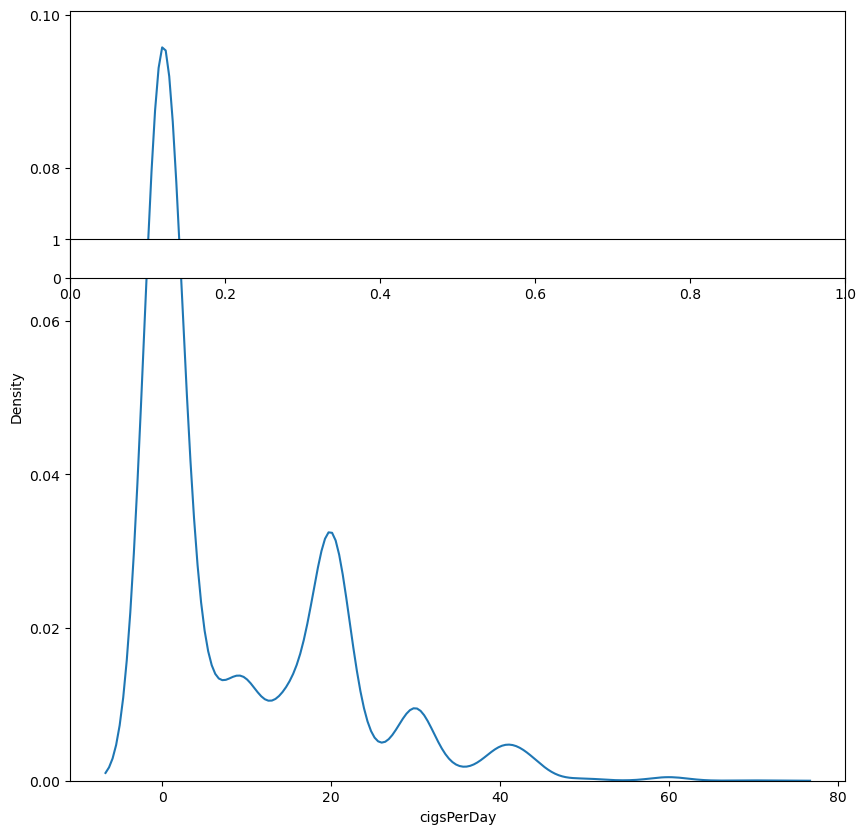

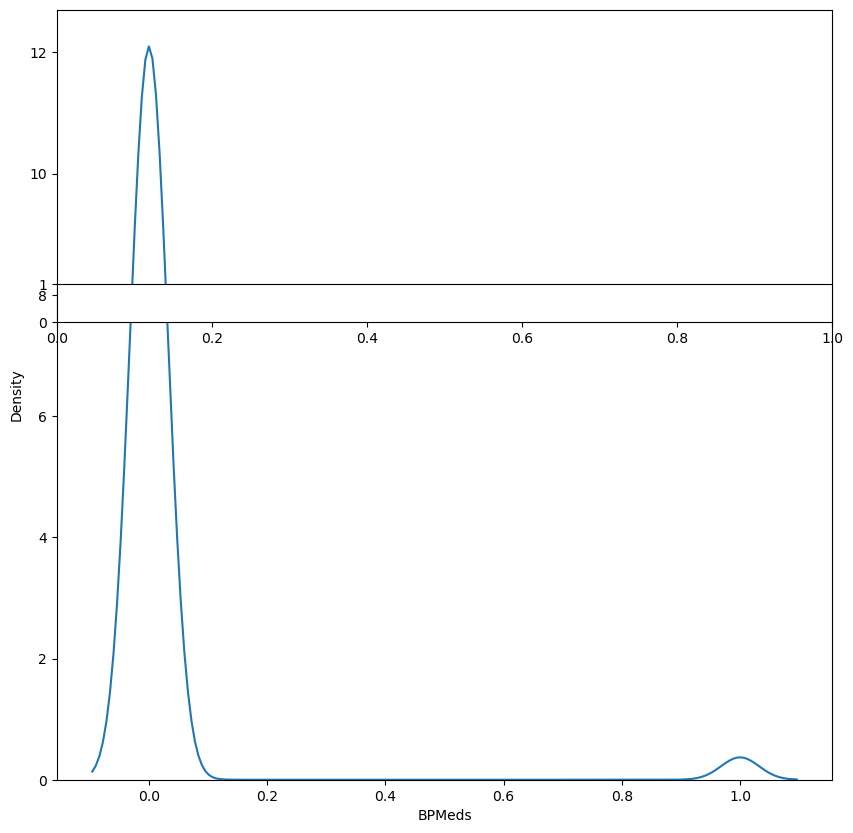

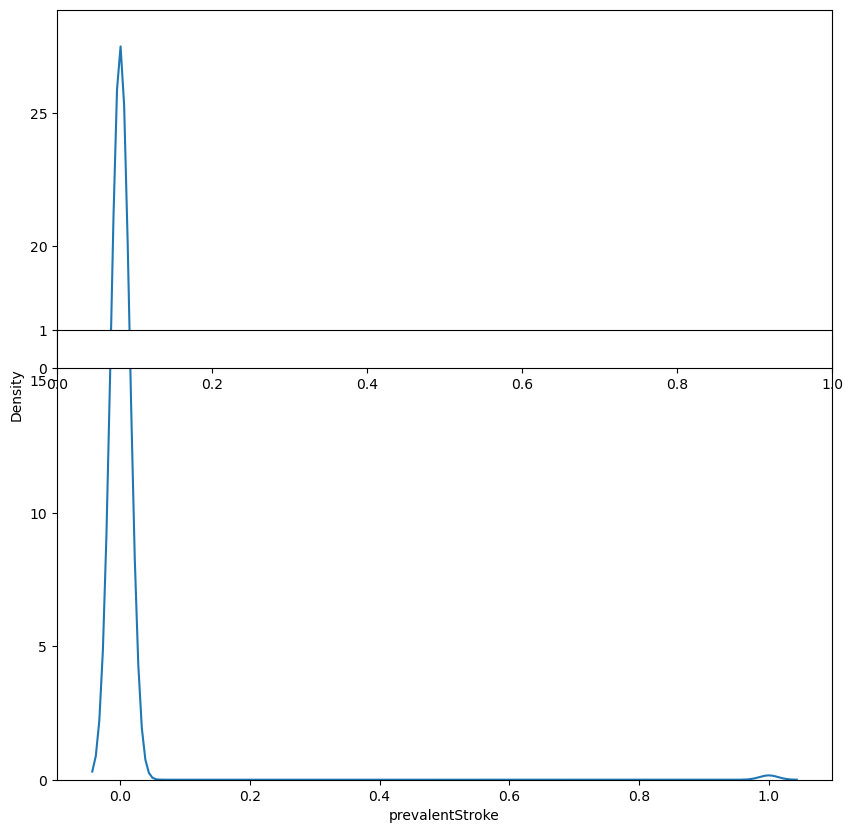

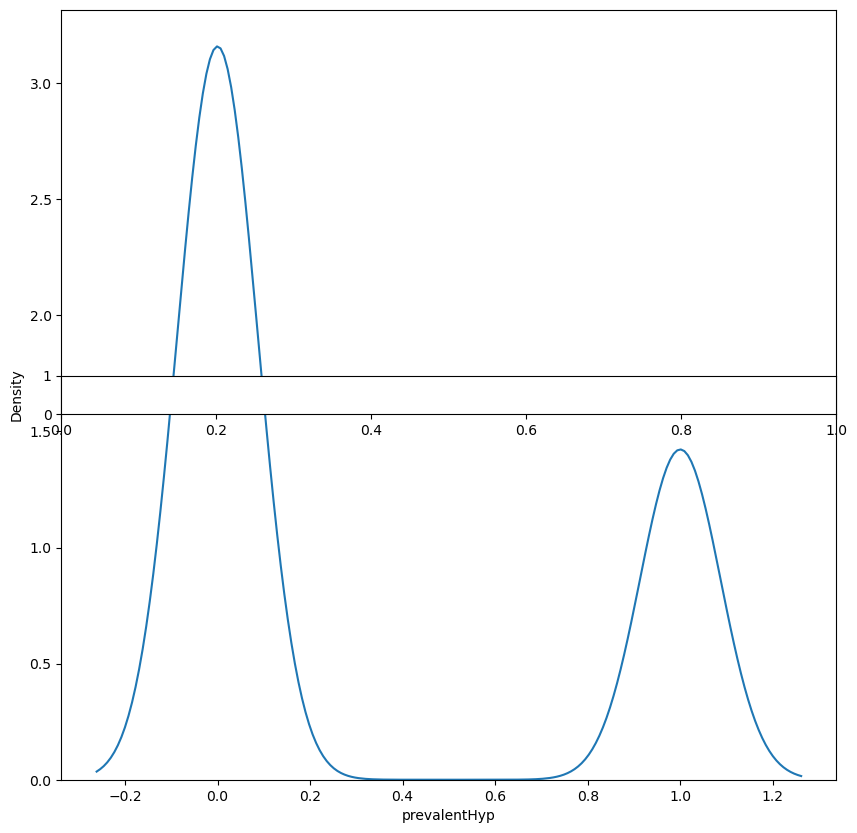

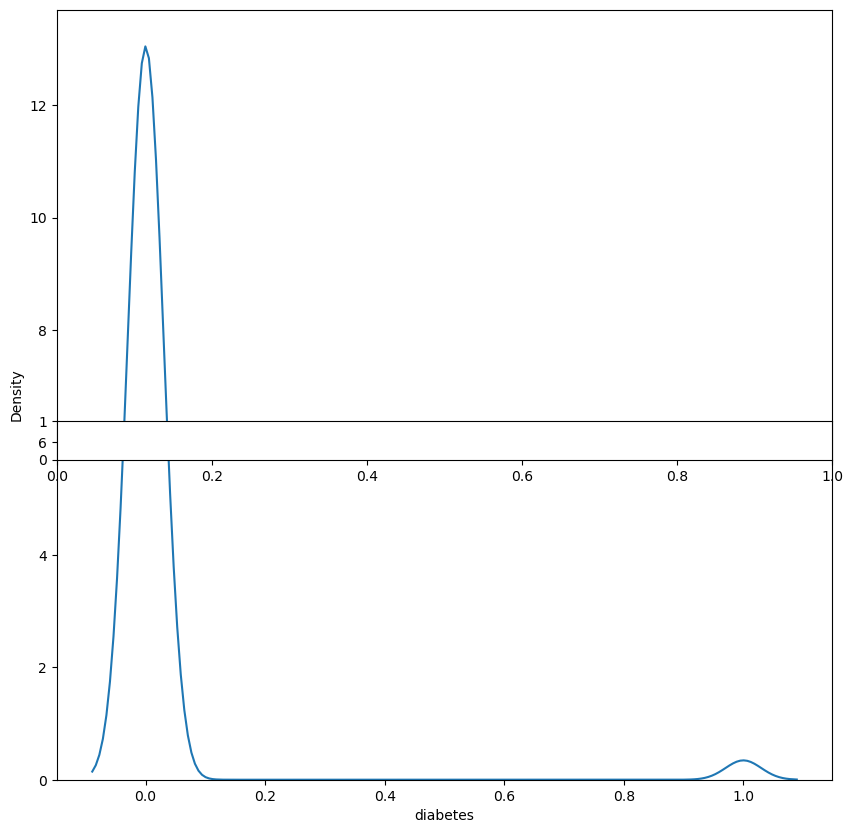

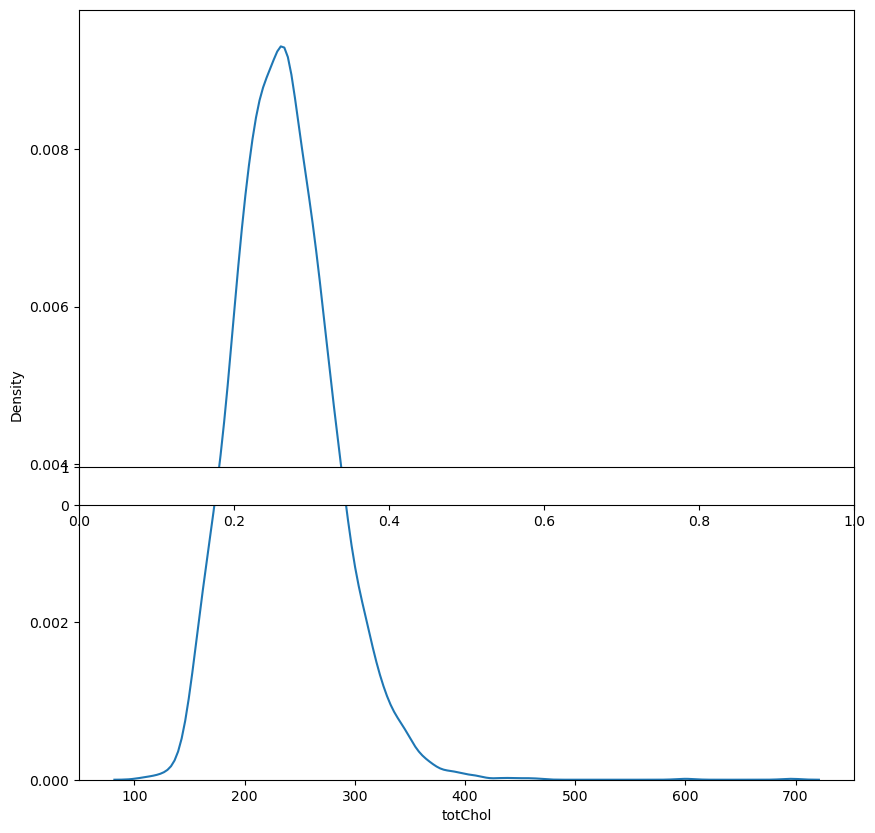

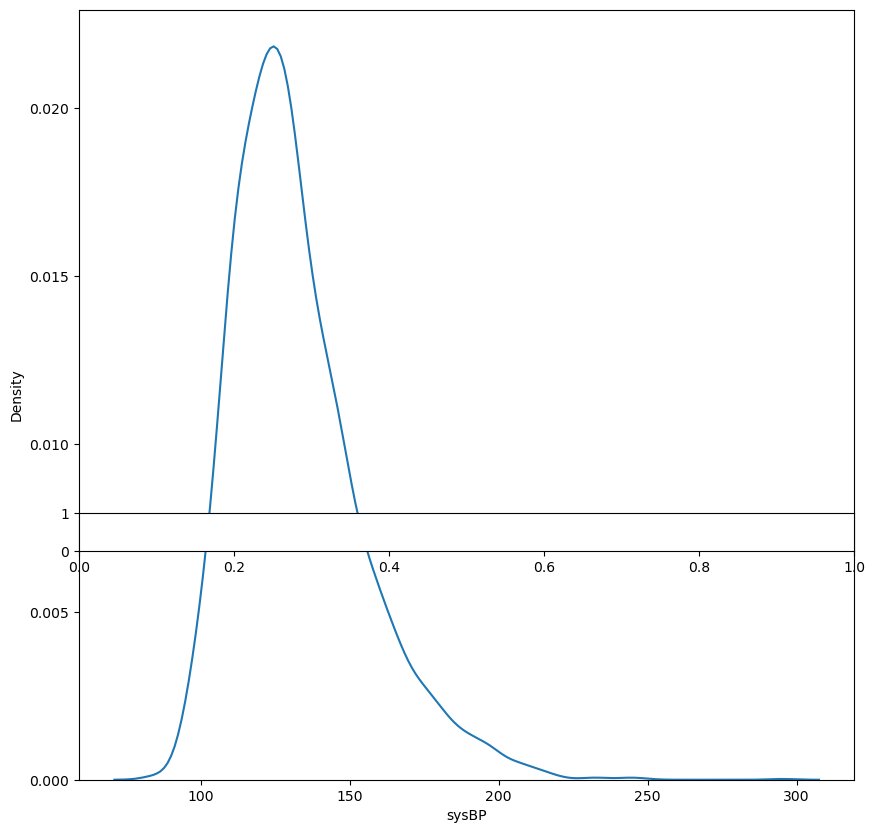

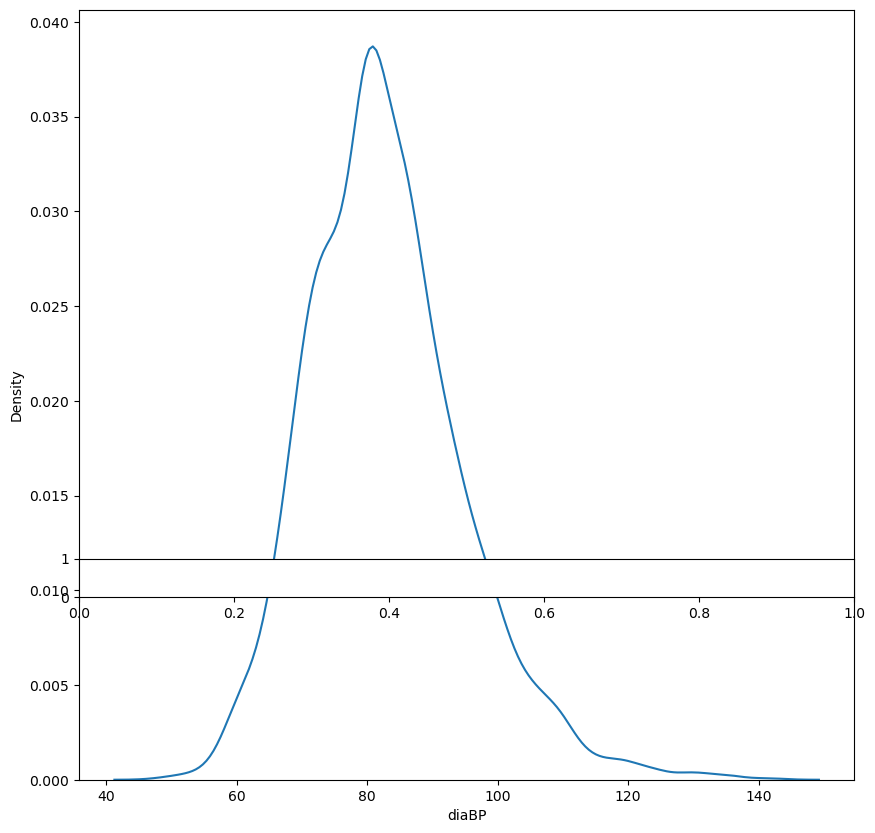

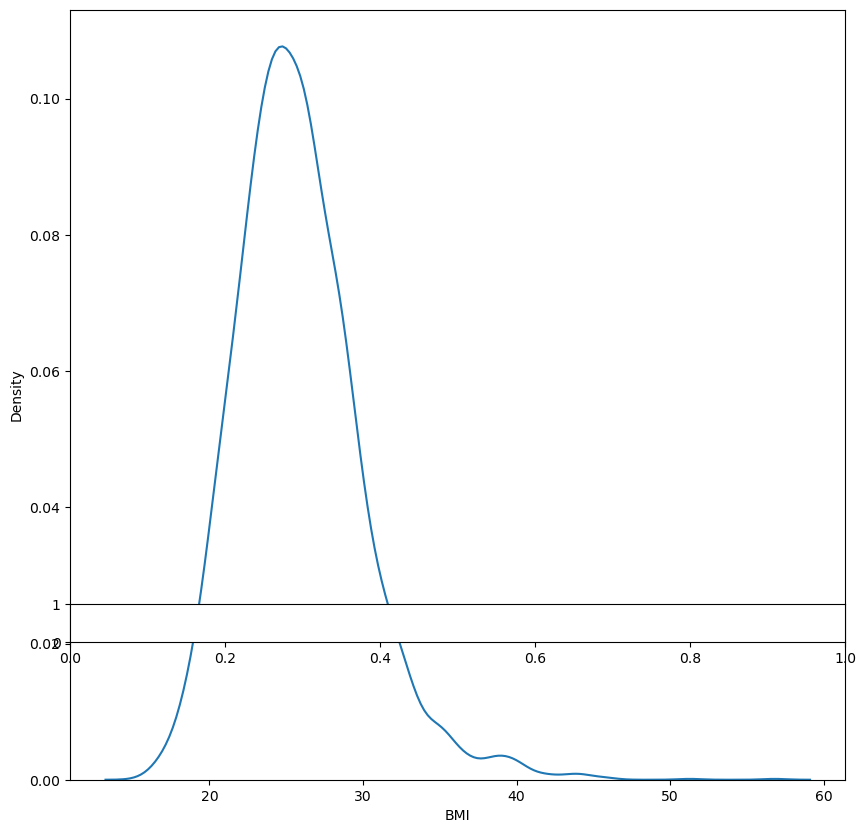

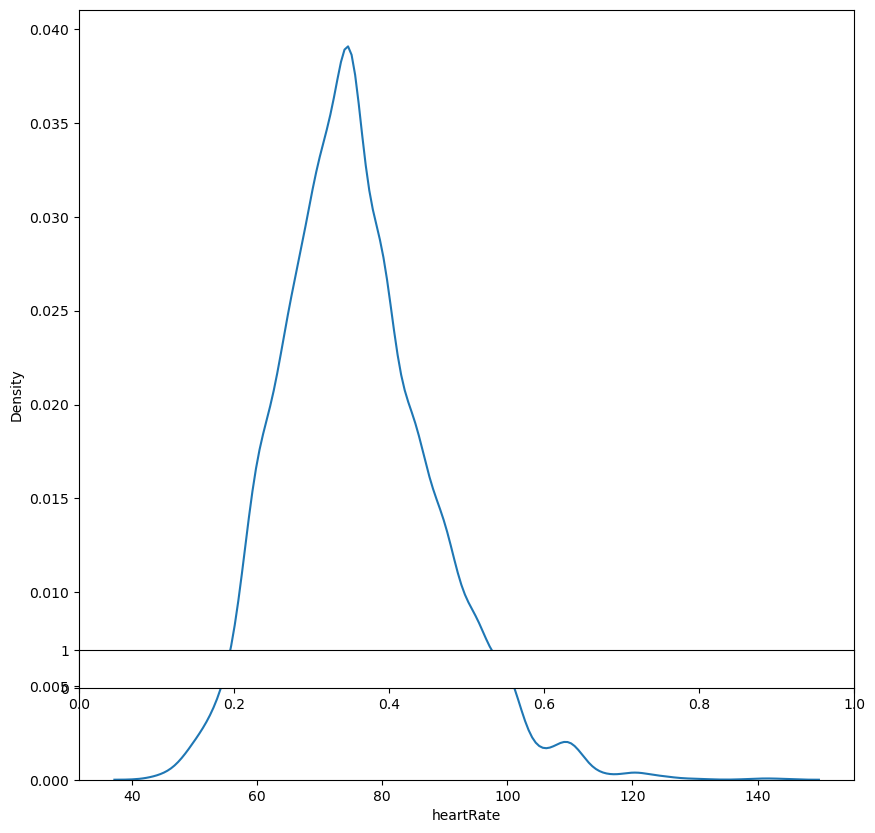

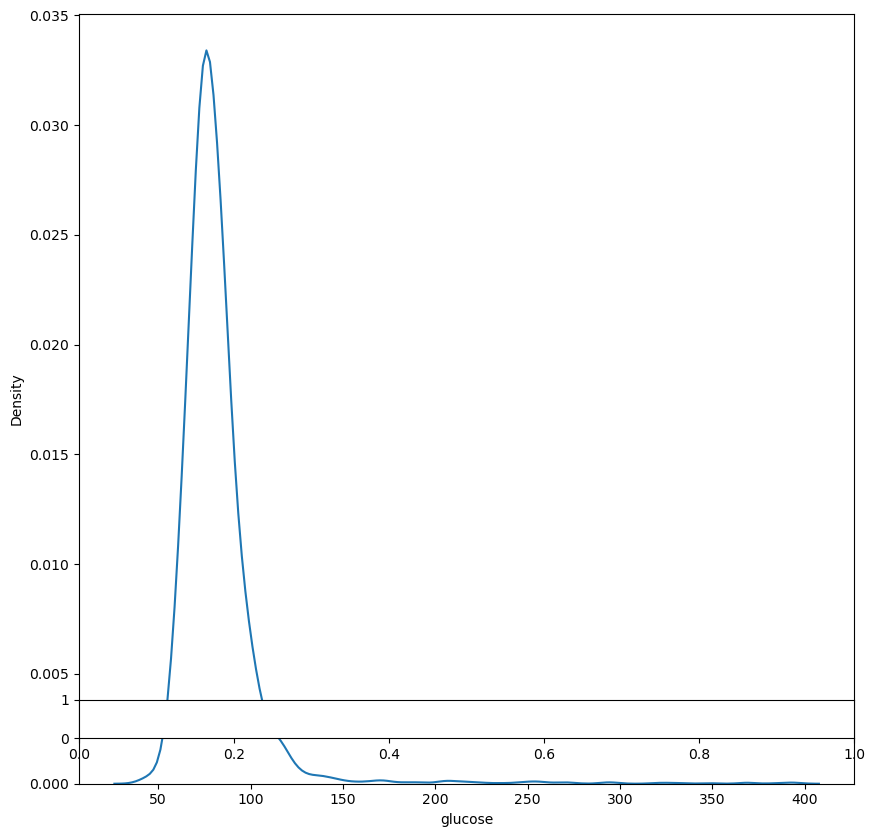

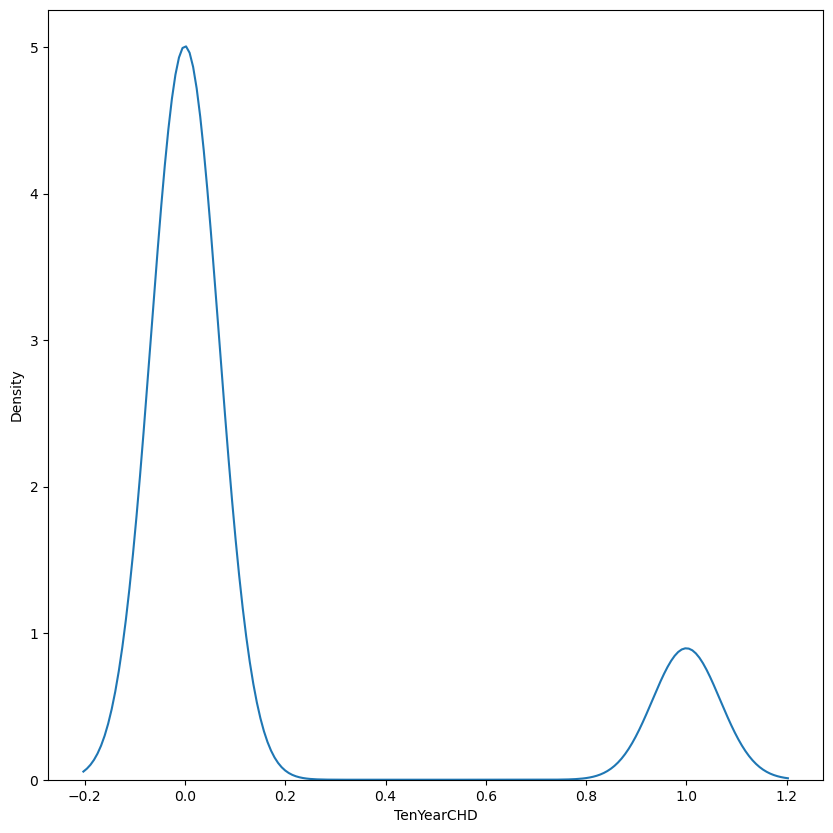

In [120]:
for i,cols in enumerate(df1.columns.to_list()):
    plt.subplot(len(df.columns)+1,1, i+1)
    plt.figure(figsize=(10,10))
    sns.kdeplot(data=df[cols])

<Axes: >

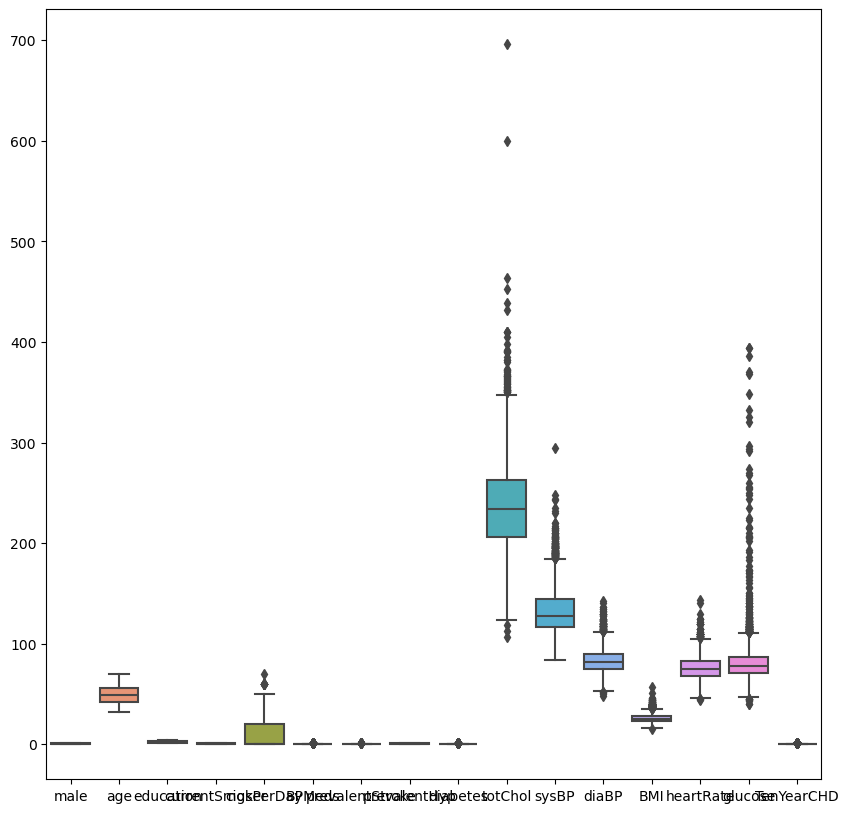

In [121]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df, ax=ax)

In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

<Axes: >

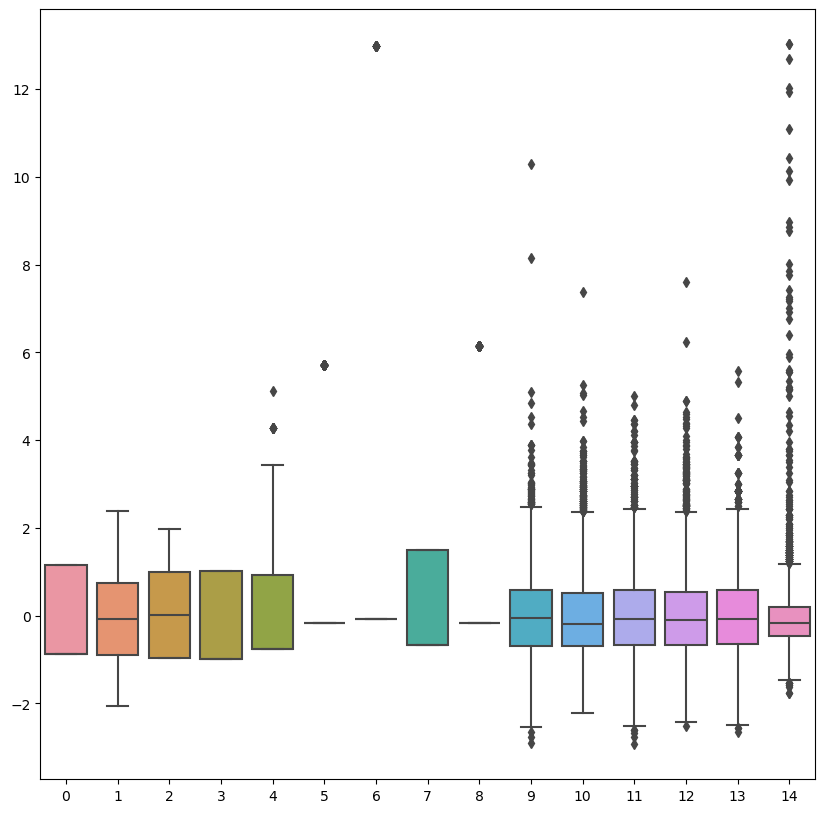

In [123]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=StandardScaler().fit_transform(df.drop(columns='TenYearCHD')), ax=ax)